In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/timeseries-dataset/holidays_events.csv
/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_1.csv
/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_2.csv
/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_3.csv


In [2]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_1.csv')
print(df.head())

   Unnamed: 0      TxnDate   TxnTime  Consumption
0       76229  01 Jan 2022  16:55:52        1.010
1       76258  01 Jan 2022  21:45:29        0.908
2       76287  01 Jan 2022  12:24:52        0.926
3       76316  01 Jan 2022  04:07:36        0.928
4       76345  01 Jan 2022  06:52:25        0.916


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1228 non-null   int64  
 1   TxnDate      1228 non-null   object 
 2   TxnTime      1228 non-null   object 
 3   Consumption  1228 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.5+ KB


In [4]:
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
reference_date = pd.to_datetime('2022-01-01')
df['Days_Since_Reference'] = (df['TxnDate'] - reference_date).dt.days

# Now, 'Days_Since_Reference' is a numeric column (float) representing the number of days.
print(df)

      Unnamed: 0    TxnDate   TxnTime  Consumption  Days_Since_Reference
0          76229 2022-01-01  16:55:52        1.010                     0
1          76258 2022-01-01  21:45:29        0.908                     0
2          76287 2022-01-01  12:24:52        0.926                     0
3          76316 2022-01-01  04:07:36        0.928                     0
4          76345 2022-01-01  06:52:25        0.916                     0
...          ...        ...       ...          ...                   ...
1223       97922 2022-01-20  21:43:55        5.128                    19
1224       97951 2022-01-20  09:43:03        5.924                    19
1225       97980 2022-01-20  03:06:05        4.664                    19
1226       98009 2022-01-20  06:16:38        3.474                    19
1227       98038 2022-01-20  16:48:03        2.478                    19

[1228 rows x 5 columns]


In [5]:
df['TxnTime'] = pd.to_datetime(df['TxnTime'])

# Extract hours, minutes, and seconds
df['Hour'] = df['TxnTime'].dt.hour
df['Minute'] = df['TxnTime'].dt.minute
df['Second'] = df['TxnTime'].dt.second

# Convert time values to a float representation, e.g., fractional hours since midnight
df['Time_Float'] = df['Hour'] + df['Minute'] / 60.0 + df['Second'] / 3600.0
df.drop(['Hour', 'Minute', 'Second'], axis=1, inplace=True)

print(df)

      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2023-11-06 16:55:52        1.010   
1          76258 2022-01-01 2023-11-06 21:45:29        0.908   
2          76287 2022-01-01 2023-11-06 12:24:52        0.926   
3          76316 2022-01-01 2023-11-06 04:07:36        0.928   
4          76345 2022-01-01 2023-11-06 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2023-11-06 21:43:55        5.128   
1224       97951 2022-01-20 2023-11-06 09:43:03        5.924   
1225       97980 2022-01-20 2023-11-06 03:06:05        4.664   
1226       98009 2022-01-20 2023-11-06 06:16:38        3.474   
1227       98038 2022-01-20 2023-11-06 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

/tmp/ipykernel_20/673632822.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TxnTime'] = pd.to_datetime(df['TxnTime'])


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# to fix the above error we have created 2 new features "Days_Since_Reference and Time_Float"
features = df[['Unnamed: 0','Days_Since_Reference','Time_Float','Consumption']]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
pca = PCA(n_components=2)  # Choose the number of components you want to keep
principal_components = pca.fit_transform(scaled_features)

# Step 7: Interpret Results
explained_variance = pca.explained_variance_ratio_
print (df)

      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2023-11-06 16:55:52        1.010   
1          76258 2022-01-01 2023-11-06 21:45:29        0.908   
2          76287 2022-01-01 2023-11-06 12:24:52        0.926   
3          76316 2022-01-01 2023-11-06 04:07:36        0.928   
4          76345 2022-01-01 2023-11-06 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2023-11-06 21:43:55        5.128   
1224       97951 2022-01-20 2023-11-06 09:43:03        5.924   
1225       97980 2022-01-20 2023-11-06 03:06:05        4.664   
1226       98009 2022-01-20 2023-11-06 06:16:38        3.474   
1227       98038 2022-01-20 2023-11-06 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

In [8]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41457699 0.34903876]


In [9]:
component_loadings = pca.components_
print(component_loadings)

[[ 0.71094897  0.69979326  0.01089034  0.06871941]
 [ 0.03211484 -0.11313399  0.694555    0.70976242]]


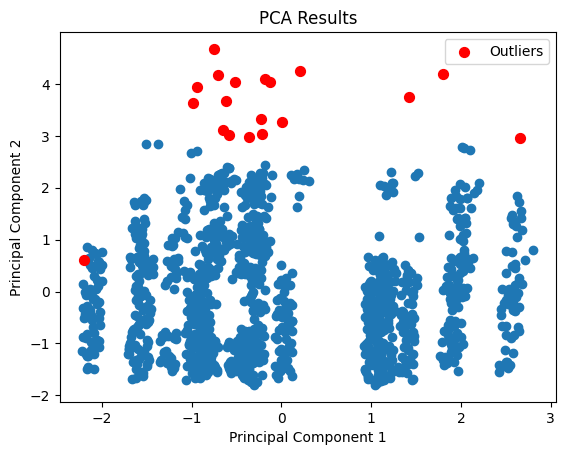

In [10]:
import matplotlib.pyplot as plt
from scipy import stats

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
z_scores = np.abs(stats.zscore(principal_components))
threshold = 2.5

outliers = np.where(z_scores > threshold)
outlier_indices = list(set(outliers[0]) | set(outliers[1]))  # Combine row and column outliers

# Highlight outliers on the scatterplot
plt.scatter(principal_components[outlier_indices, 0], principal_components[outlier_indices, 1], c='red', s=50, label='Outliers')
plt.legend()
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have already applied PCA as shown in your code and have 'principal_components'
# Also, make sure 'df' contains your original data before PCA.

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Unnamed: 0', 'Days_Since_Reference', 'Time_Float', 'Consumption']])

# Create a PCA object with the number of components you used originally
n_components = 2  # Replace with the number of components you used
pca = PCA(n_components=n_components)

# Fit the PCA model on the scaled data
pca.fit(scaled_features)

# Reconstruct the data points from the PCA components
reconstructed_data = pca.inverse_transform(principal_components)

# Create a DataFrame with the reconstructed data
reconstructed_df = pd.DataFrame(data=reconstructed_data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

# Concatenate the 'Unnamed: 0' column if you want it in the reconstructed DataFrame
reconstructed_df['Unnamed: 0'] = df['Unnamed: 0']

# Display the reconstructed DataFrame
print(reconstructed_df)


      Feature1  Feature2  Feature3  Feature4  Unnamed: 0
0    -1.563279 -1.561054  0.083007 -0.042210       76229
1    -1.542076 -1.607265  0.404988  0.287333       76258
2    -1.579883 -1.509476 -0.242937 -0.375416       76287
3    -1.613437 -1.422352 -0.819583 -0.965245       76316
4    -1.599428 -1.448086 -0.629855 -0.770939       76345
...        ...       ...       ...       ...         ...
1223  1.946051  1.742615  0.858879  1.032217       97922
1224  1.912436  1.860660  0.133673  0.291126       97951
1225  1.860546  1.942169 -0.502876 -0.361181       97980
1226  1.852532  1.922779 -0.447850 -0.305806       98009
1227  1.880311  1.826388  0.145891  0.300961       98038

[1228 rows x 5 columns]


In [12]:
from scipy import stats

# Calculate z-scores for the reconstructed data
z_scores_reconstructed = np.abs(stats.zscore(reconstructed_data))
threshold = 2.5  # Set your desired threshold for anomaly detection

# Find outlier indices based on the threshold
outliers_reconstructed = np.where(z_scores_reconstructed > threshold)
outlier_indices_reconstructed = list(set(outliers_reconstructed[0]) | set(outliers_reconstructed[1]))  # Combine row and column outliers

# Display the indices of anomalies in the reconstructed data
print("Anomaly Indices in Reconstructed Data:", outlier_indices_reconstructed)


Anomaly Indices in Reconstructed Data: [193, 2, 3, 1030, 651, 1169, 82, 84, 89, 799, 1056, 290, 312, 423, 359, 489, 364, 240, 242, 311, 568]


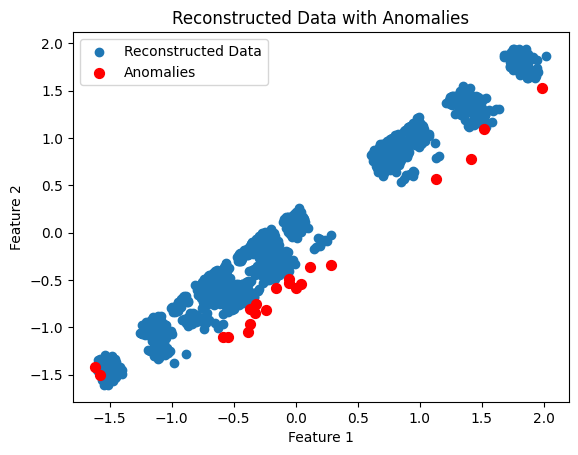

In [13]:
import matplotlib.pyplot as plt

# Scatterplot of the reconstructed data
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data')

# Highlight anomalies in red
plt.scatter(reconstructed_data[outlier_indices_reconstructed, 0], reconstructed_data[outlier_indices_reconstructed, 1], c='red', s=50, label='Anomalies')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Reconstructed Data with Anomalies')
plt.legend()
plt.show()
